# Sentiment analysis using LSTM 

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import pandas as pd
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

### Reading lines from file with utf-8 encoding

In [5]:
with open("C:\\Users\\mukes\\OneDrive\\Desktop\\LSTM_sent\\train.txt", 'r', encoding='utf-8') as file:
    lines = file.readlines()

### Print the first 5 lines to inspect the data format

In [6]:
lines[:5] 

['__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\n',
 "__label__2 The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.\n",
 '__label__2 Amazing!: This s

### Spliting lines with space

In [7]:
data = [line.strip().split(' ', maxsplit=1) for line in lines]

### printing first 5 lines of data

In [8]:
data[:5]

[['__label__2',
  'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'],
 ['__label__2',
  "The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."],
 ['__label__2',
  '

### Creating dataframe with labels and text columns 

In [9]:
data_df = pd.DataFrame(data, columns=['Label', 'Text'])

In [10]:
data_df.head(10)

,Label,Text
0,__label__2,Stuning even for the non-gamer: This sound tra...
1,__label__2,The best soundtrack ever to anything.: I'm rea...
2,__label__2,Amazing!: This soundtrack is my favorite music...
3,__label__2,Excellent Soundtrack: I truly like this soundt...
4,__label__2,"Remember, Pull Your Jaw Off The Floor After He..."
5,__label__2,an absolute masterpiece: I am quite sure any o...
6,__label__1,"Buyer beware: This is a self-published book, a..."
7,__label__2,Glorious story: I loved Whisper of the wicked ...
8,__label__2,A FIVE STAR BOOK: I just finished reading Whis...
9,__label__2,Whispers of the Wicked Saints: This was a easy...


### Mapping labels with positive and negative 

In [11]:
data_df['Label_encoded'] = data_df['Label'].replace({'__label__2' : 'Positive', '__label__1' : 'Negative'})

In [12]:
data_df.head(10)

,Label,Text,Label_encoded
0,__label__2,Stuning even for the non-gamer: This sound tra...,Positive
1,__label__2,The best soundtrack ever to anything.: I'm rea...,Positive
2,__label__2,Amazing!: This soundtrack is my favorite music...,Positive
3,__label__2,Excellent Soundtrack: I truly like this soundt...,Positive
4,__label__2,"Remember, Pull Your Jaw Off The Floor After He...",Positive
5,__label__2,an absolute masterpiece: I am quite sure any o...,Positive
6,__label__1,"Buyer beware: This is a self-published book, a...",Negative
7,__label__2,Glorious story: I loved Whisper of the wicked ...,Positive
8,__label__2,A FIVE STAR BOOK: I just finished reading Whis...,Positive
9,__label__2,Whispers of the Wicked Saints: This was a easy...,Positive


In [13]:
data_df.drop('Label', axis = 1, inplace=True)

In [14]:
data_df.head(10)

,Text,Label_encoded
0,Stuning even for the non-gamer: This sound tra...,Positive
1,The best soundtrack ever to anything.: I'm rea...,Positive
2,Amazing!: This soundtrack is my favorite music...,Positive
3,Excellent Soundtrack: I truly like this soundt...,Positive
4,"Remember, Pull Your Jaw Off The Floor After He...",Positive
5,an absolute masterpiece: I am quite sure any o...,Positive
6,"Buyer beware: This is a self-published book, a...",Negative
7,Glorious story: I loved Whisper of the wicked ...,Positive
8,A FIVE STAR BOOK: I just finished reading Whis...,Positive
9,Whispers of the Wicked Saints: This was a easy...,Positive


### Extract text and labels from the DataFrame

###  Tokenization and padding

In [15]:
# Set random seed for NumPy
np.random.seed(42)

### Mapping labels with numerical values

In [16]:
label_mapping = {'Positive' : 0, 'Negative' : 1}

### Converting labels to list

In [17]:
labels = data_df['Label_encoded'].map(label_mapping).tolist()

### Converting them to array

In [18]:
# Convert labels to numeric values (assuming labels are already encoded as numbers)
labels = np.array(labels)

In [19]:
labels

array([0, 0, 0, ..., 1, 1, 0])

### Converting text to list

In [20]:
texts = data_df['Text'].tolist()

In [21]:
texts[:10]

['Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^',
 "The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.",
 'Amazing!: This soundtrack is my favorite music of all

### Proccessing text tokenization, sequence, padding

In [22]:
max_words = 1000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
data_1 = pad_sequences(sequences, maxlen = max_len)

In [23]:
num_classes = len(np.unique(labels))
labels = tf.keras.utils.to_categorical(labels, num_classes=num_classes)
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

### Split data into training and test sets (you can use sklearn's train_test_split)


In [24]:
train_size = int(0.8 * len(data_1))
x_train = data_1[:train_size]
y_train = labels[:train_size]
x_test = data_1[train_size:]
y_test = labels[train_size:]

### Build the LSTM model

In [25]:
# Set random seed for TensorFlow
tf.random.set_seed(42)
embedding_dim = 50
lstm_units = 64

model = Sequential()
model.add(Embedding(input_dim = max_words, output_dim = embedding_dim, input_length = max_len))
model.add(LSTM(units=lstm_units))
model.add(Dense(2, activation = 'sigmoid'))

In [26]:
# Compile the model
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [27]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [28]:
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


In [29]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU is available for training.")
else:
    print("No GPU available, using CPU for training.")

GPU is available for training.


### Training model 

In [30]:
epochs = 10
batch_size = 64
history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split=0.2)

Epoch 1/10
36000/36000 [==============================] - 370s 10ms/step - loss: 0.2275 - accuracy: 0.9071 - val_loss: 0.1924 - val_accuracy: 0.9236
Epoch 2/10
36000/36000 [==============================] - 361s 10ms/step - loss: 0.1888 - accuracy: 0.9251 - val_loss: 0.1760 - val_accuracy: 0.9305
Epoch 3/10
36000/36000 [==============================] - 363s 10ms/step - loss: 0.1757 - accuracy: 0.9309 - val_loss: 0.1701 - val_accuracy: 0.9333
Epoch 4/10
36000/36000 [==============================] - 363s 10ms/step - loss: 0.1683 - accuracy: 0.9342 - val_loss: 0.1669 - val_accuracy: 0.9346
Epoch 5/10
36000/36000 [==============================] - 363s 10ms/step - loss: 0.1633 - accuracy: 0.9365 - val_loss: 0.1651 - val_accuracy: 0.9355
Epoch 6/10
36000/36000 [==============================] - 367s 10ms/step - loss: 0.1595 - accuracy: 0.9383 - val_loss: 0.1661 - val_accuracy: 0.9351
Epoch 7/10
36000/36000 [==============================] - 360s 10ms/step - loss: 0.1568 - accuracy: 0.9393

### Plotting metrics 

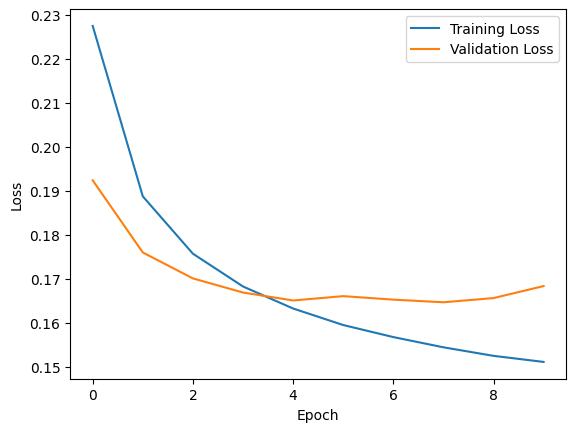

In [31]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

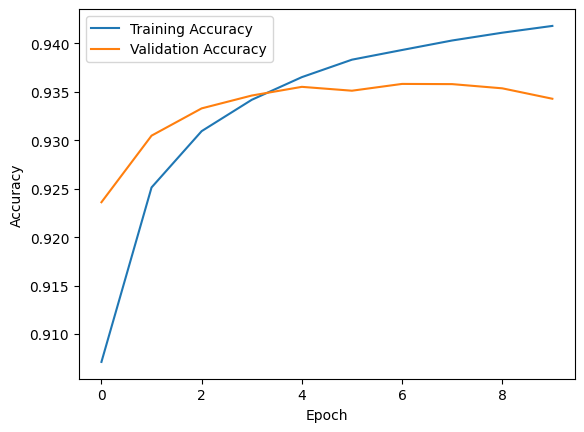

In [32]:
# Plot training and validation accuracy
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Saving model

In [33]:
model.save('C:/Users/mukes/OneDrive/Desktop/LSTM_sent/LSTM_model_3.h5')

In [34]:
from tensorflow.keras.models import load_model

### Loading model

In [53]:
model = load_model(r'C:/Users/mukes/OneDrive/Desktop/LSTM_sent/LSTM_model_3.h5')

### Evaluating validation dataset

In [54]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

22500/22500 [==============================] - 95s 4ms/step - loss: 0.1687 - accuracy: 0.9345
Test accuracy: 0.9345


### Reading line from new unseen dataset (separate file)

In [212]:
with open('C:\\Users\\mukes\\OneDrive\\Desktop\\LSTM_sent\\test.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

### Printing first 5 lines

In [213]:
lines[:5]

['__label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"\n',
 "__label__2 One of the best game music soundtracks - for a game I didn't really play: Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there's not too 

### Printing first 5 lines 

In [214]:
test = [line.strip().split(' ', maxsplit = 1) for line in lines]
test[:5]

[['__label__2',
  'Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"'],
 ['__label__2',
  "One of the best game music soundtracks - for a game I didn't really play: Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there

### Converting new file to dataframe with columns 

In [215]:
data_test_df = pd.DataFrame(test, columns = ['Label', 'Text'])
data_test_df.head(10)

,Label,Text
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...
1,__label__2,One of the best game music soundtracks - for a...
2,__label__1,Batteries died within a year ...: I bought thi...
3,__label__2,"works fine, but Maha Energy is better: Check o..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...
5,__label__1,DVD Player crapped out after one year: I also ...
6,__label__1,"Incorrect Disc: I love the style of this, but ..."
7,__label__1,DVD menu select problems: I cannot scroll thro...
8,__label__2,Unique Weird Orientalia from the 1930's: Exoti...
9,__label__1,"Not an ""ultimate guide"": Firstly,I enjoyed the..."


### Mapping labels on new files

In [216]:
data_test_df['Label_encoded'] = data_test_df['Label'].replace({'__label__2' : 'Positive', '__label__1' : 'Negative'})
data_test_df.head(10)

,Label,Text,Label_encoded
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...,Positive
1,__label__2,One of the best game music soundtracks - for a...,Positive
2,__label__1,Batteries died within a year ...: I bought thi...,Negative
3,__label__2,"works fine, but Maha Energy is better: Check o...",Positive
4,__label__2,Great for the non-audiophile: Reviewed quite a...,Positive
5,__label__1,DVD Player crapped out after one year: I also ...,Negative
6,__label__1,"Incorrect Disc: I love the style of this, but ...",Negative
7,__label__1,DVD menu select problems: I cannot scroll thro...,Negative
8,__label__2,Unique Weird Orientalia from the 1930's: Exoti...,Positive
9,__label__1,"Not an ""ultimate guide"": Firstly,I enjoyed the...",Negative


### Dropping labels from new files and adding encodded labels

In [217]:
data_test_df.drop('Label', axis = 1, inplace=True)
data_test_df.head(10)

,Text,Label_encoded
0,Great CD: My lovely Pat has one of the GREAT v...,Positive
1,One of the best game music soundtracks - for a...,Positive
2,Batteries died within a year ...: I bought thi...,Negative
3,"works fine, but Maha Energy is better: Check o...",Positive
4,Great for the non-audiophile: Reviewed quite a...,Positive
5,DVD Player crapped out after one year: I also ...,Negative
6,"Incorrect Disc: I love the style of this, but ...",Negative
7,DVD menu select problems: I cannot scroll thro...,Negative
8,Unique Weird Orientalia from the 1930's: Exoti...,Positive
9,"Not an ""ultimate guide"": Firstly,I enjoyed the...",Negative


In [218]:
texts = data_test_df['Text'].tolist()
label_mapping = {'Positive' : 0, 'Negative' : 1}
labels = data_test_df['Label_encoded'].map(label_mapping).tolist()
labels[:10]

[0, 0, 1, 0, 0, 1, 1, 1, 0, 1]

In [219]:
labels = np.array(labels)
labels[:10]

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1])

### Processing new text file

In [220]:
max_words = 1000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
data_2 = pad_sequences(sequences, maxlen = max_len)

In [221]:
num_classes = len(np.unique(labels))
labels = tf.keras.utils.to_categorical(labels, num_classes=num_classes)
labels

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

### Spliting dataset on unseen dataset (Separate file)

In [222]:
X_val = data_2
Y_val = labels

### Array representation of validation dataset

In [223]:
X_val

array([[  0,   0,   0, ...,  13,  12, 924],
       [144,   1, 118, ..., 368, 161,   6],
       [  0,   0,   0, ...,  21,  89, 428],
       ...,
       [  0,   0,   0, ...,  36,  11, 434],
       [  0,   0,   0, ..., 475,   5,  48],
       [130,  65,   7, ...,  21,   5, 199]])

### Array representation of labels 

In [224]:
labels

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

### Evaluating model on new unseen data (Separate file)

In [225]:
loss, accuracy = model.evaluate(X_val, Y_val)
print(f'Test accuracy: {accuracy:.4f}')

12500/12500 [==============================] - 55s 4ms/step - loss: 0.6205 - accuracy: 0.7371
Test accuracy: 0.7371


### Predicting sentiment on new unseen data (Separate file)

In [226]:
predictions = model.predict(X_val)

12500/12500 [==============================] - 50s 4ms/step


### Array representation of predicted values 

In [227]:
predictions

array([[0.99823195, 0.00176805],
       [0.8319628 , 0.16803718],
       [0.23316072, 0.76683927],
       ...,
       [0.17394008, 0.8260598 ],
       [0.11051562, 0.8894844 ],
       [0.0386469 , 0.9613531 ]], dtype=float32)

### Output representation 

In [228]:
new_text = [data_test_df['Text'][2]]
new_sequences = tokenizer.texts_to_sequences(new_text) #data_test_df['Text'][0]
new_data = pad_sequences(new_sequences, maxlen=max_len)
predicted = model.predict(new_data)
predicted = np.argmax(predicted, axis=1)
if predicted[0] == 0:
    print('Positive sentiment', predicted)
else:
    print('Negative sentiment', predicted)

1/1 [==============================] - 0s 23ms/step
Negative sentiment [1]


In [229]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve

In [230]:
np.shape(labels)

(400000, 2)

In [231]:
np.shape(predictions)

(400000, 2)

In [232]:
labels

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [233]:
# Convert probabilities to binary predictions (0 or 1)
binary_predictions = (predictions[:, 1] > 0.5).astype(int)
binary_labels = labels.argmax(axis = 1)

In [234]:
accuracy = accuracy_score(binary_labels, binary_predictions)
accuracy

0.7370625

In [235]:
precision = precision_score(binary_labels, binary_predictions)
precision

0.7111022061933703

In [236]:
recall = recall_score(binary_labels, binary_predictions)
recall

0.79855

In [237]:
f1 = f1_score(binary_labels, binary_predictions)
f1

0.7522933619095844

In [238]:
cm = confusion_matrix(binary_labels, binary_predictions)

In [239]:
import seaborn as sns

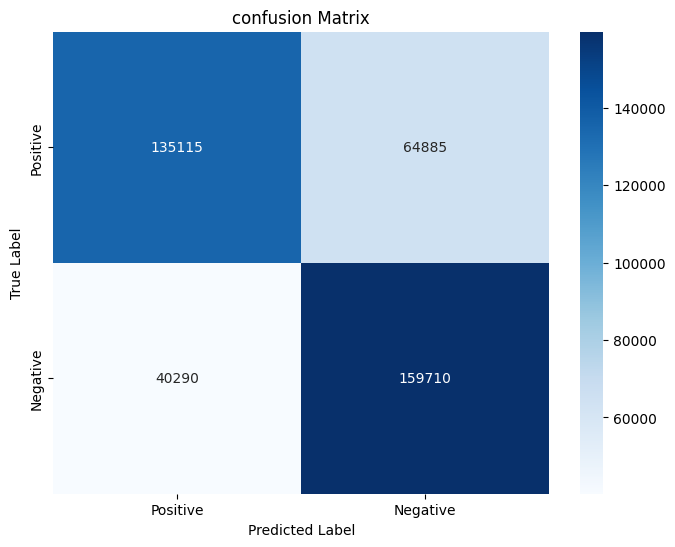

In [240]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('confusion Matrix')
plt.show()


In [241]:
labels

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [242]:
predictions

array([[0.99823195, 0.00176805],
       [0.8319628 , 0.16803718],
       [0.23316072, 0.76683927],
       ...,
       [0.17394008, 0.8260598 ],
       [0.11051562, 0.8894844 ],
       [0.0386469 , 0.9613531 ]], dtype=float32)

In [243]:
predicted_probs = np.array([predictions])
predicted_probs

array([[[0.99823195, 0.00176805],
        [0.8319628 , 0.16803718],
        [0.23316072, 0.76683927],
        ...,
        [0.17394008, 0.8260598 ],
        [0.11051562, 0.8894844 ],
        [0.0386469 , 0.9613531 ]]], dtype=float32)

In [244]:
labels = np.array([labels])
labels

array([[[1., 0.],
        [1., 0.],
        [0., 1.],
        ...,
        [0., 1.],
        [1., 0.],
        [0., 1.]]], dtype=float32)

In [245]:
predicted_probs = predicted_probs.squeeze()
labels = labels.squeeze()

In [246]:
predicted_probs

array([[0.99823195, 0.00176805],
       [0.8319628 , 0.16803718],
       [0.23316072, 0.76683927],
       ...,
       [0.17394008, 0.8260598 ],
       [0.11051562, 0.8894844 ],
       [0.0386469 , 0.9613531 ]], dtype=float32)

In [247]:
labels

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [248]:
# Calculate the false positive rate (fpr) and true positive rate (tpr) for the ROC curve
fpr, tpr, _ = roc_curve(labels[:, 0], predicted_probs[:, 0])

In [249]:
# Calculate the AUC score
roc_auc = auc(fpr, tpr)

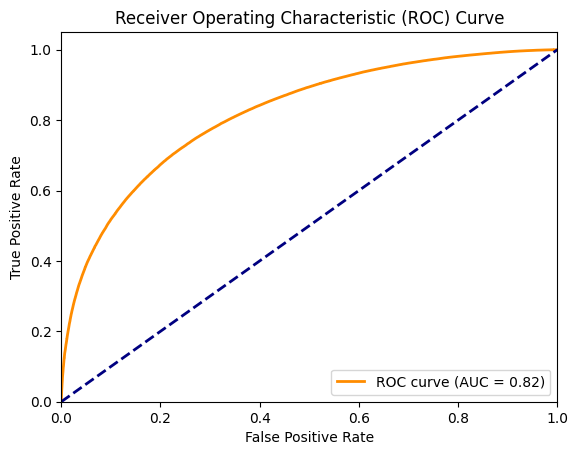

In [250]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()